# predict profit for food truck

# problem statment : 
In this project , we are implrmrnting linear regression with one variable to predict profits for a food truck. The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city .A negative value for profit indicates a loss.

Dataset is below:

population(10,000s)   profit(10,000s $)

  5.5277                 13.662 
  8.5186                 9.1302 
  6.1101                 6.8233 
*Now we have to predict profit for given population city(including which is not traverse by our food truck).

In [36]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd    #to work on the datasets

In [37]:
#reading data
data=pd.read_csv("profitdataset.txt")
print(data.shape)

(97, 2)


In [38]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [39]:
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [40]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [41]:
# get x and y data values
x=data['Population'].values
y=data['Profit'].values

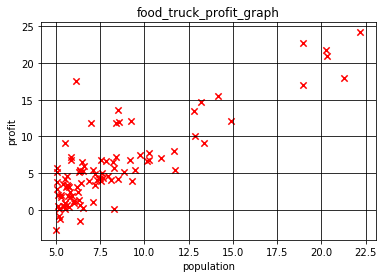

In [42]:
#plot the data values
%matplotlib inline
plt.scatter(x,y,40,c='r',label='scatter_data',marker='x')
plt.xlabel('population')
plt.ylabel('profit')
plt.title('food_truck_profit_graph')
plt.grid(True,color='k')
plt.show()

In [43]:
#mean values
mean_x=np.mean(x)
mean_y=np.mean(y)
n=len(x)
mean_x

8.159799999999999

In [44]:
#y=mx+c, to get the values m and c
num=0
den=0
for i in range(n):
    num=num+((x[i]-mean_x)*(y[i]-mean_y))
    den=den+((x[i]-mean_x)**2)
m=num/den
#c=y-m+x
c=mean_y-(m*mean_x)
print(m,c)

1.193033644189594 -3.8957808783118537


In [49]:
#calculate y_predicate
y_pred=np.array([])       #to create empty array

for i in range(n):
    p=(m*x[i])+c         #y=mx+c
    y_pred=np.append(y_pred,np.array([p]),axis=0)
    
print(y_pred)    

[ 3.39377399  2.6989512   6.26719552  4.45927234  3.09515767  6.10530086
  5.02381586  6.33818102  3.84247394  2.13452698  2.91727635 13.00234766
  2.94507404  6.13572322  2.833764    2.52202431  3.69835548  2.22460102
  3.77494824  4.53992141  3.48802365 20.28701109  2.65409313  3.65146926
  2.74333205 18.70624151 11.40845471  9.17628876 11.82363042 22.59314512
  2.37050903  3.96559502  7.13763287  3.13333475  5.90033768  5.56903223
  5.7629002   2.79272364 11.41799898  3.68403908  2.55483273  4.31527318
 10.07225703  2.99243747  5.43934948  4.56652606  2.1531383   3.02548451
 10.06271276  2.71553436  5.09993141  2.43648379  4.96118159  5.17497322
  3.65946258  3.69060076  3.58955081  2.83257096  7.21160096  7.38268198
  6.63321825  2.28329828 21.49078204 13.88996469 18.72294398  4.71577457
  6.0005525   8.3161115   2.66518834 20.37171648  8.19680814  4.85452438
  3.2698178   4.72496093  2.10147995  3.91608412  5.09802255  2.11293307
  8.36144678  2.19787707  2.93934748  2.29415488  3

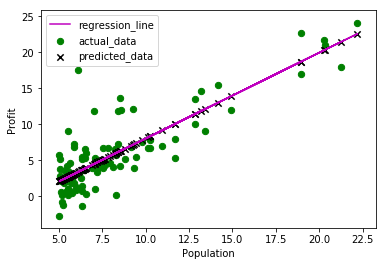

In [47]:
#plot the regression line
plt.plot(x,y_pred,color='m',label="regression_line")
#plot the actual data
plt.scatter(x,y,40,c='g',label="actual_data",marker='o')
plt.scatter(x,y_pred,40,c='k',label="predicted_data",marker='x')
plt.xlabel("Population")
plt.ylabel('Profit')
plt.legend()
plt.show()

In [48]:
# how good cur fit line or regression line is by using r square method
nu=0
de=0
for i in range(n):
    nu=nu+((y_pred[i]-mean_y)**2)   #predicted values of y
    de=de+((y[i]-mean_y)**2)     #actual values of y
r2=nu/de
r2


#r square ranges from 0 to 1 if >0.7.then its good fit line

0.70203155378414